As an example to show some data analysis techniques, we imagine measurements of energy use from a set of dorm rooms in a few dorms.  

It is likely that the data will be in the following format where each room's observation is on a single row.

|    | household   | dorm    |   phone_energy |   laptop_energy |
|---:|:------------|:--------|---------------:|----------------:|
|  0 | A           | tuscany |             10 |              50 |
|  1 | B           | sauv    |             30 |              60 |
|  2 | C           | tuscany |             12 |              45 |
|  3 | D           | sauv    |             20 |              50 |

We may want to answer a set of questions.

- Which dorm uses more energy?
- Which appliance uses more energy?
- Does one dorm have more energy from different sorts of appliances?

To do this, it may make sense to separate each observation of the phone energy use and the laptop energy use into a separate observation.  If we do structure the data in this way, we can take advantage of some powerful existing computer processes to analyze data in this format.

This format is often called tidy data an is fully explained in this 
[link](http://vita.had.co.nz/papers/tidy-data.pdf).

In [32]:
data = '''
household,dorm,phone_energy,laptop_energy
A,tuscany,10,50
B,sauv,30,60
C,tuscany,12,45
D,sauv,20,50
'''

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from io import StringIO
from tabulate import tabulate

df = pd.read_csv(StringIO(data))
df

,household,dorm,phone_energy,laptop_energy
0,A,tuscany,10,50
1,B,sauv,30,60
2,C,tuscany,12,45
3,D,sauv,20,50


This format makes sense to us and is easy to read, but is cumbersome for a computer to work with.  If we instead treat each energy measurement as an observation, we can reshape the data.

In [16]:
tidy_df = pd.melt(df, id_vars='dorm', 
        value_vars=['phone_energy', 'laptop_energy'],
        var_name='energy_use',
        value_name='energy_kWh')
tidy_df

,dorm,energy_use,energy_kWh
0,tuscany,phone_energy,10
1,sauv,phone_energy,30
2,tuscany,phone_energy,12
3,sauv,phone_energy,20
4,tuscany,laptop_energy,50
5,sauv,laptop_energy,60
6,tuscany,laptop_energy,45
7,sauv,laptop_energy,50


In this format, it is much easier to use plotting programs to understand the variations in the data.

We can use a tool called a groupby which does what it's name implies, it groups data by a similar attribute like the type of energy use or the name of the dorm.

In [21]:
pd.groupby(tidy_df, by='energy_use').sum()

,energy_kWh
energy_use,
laptop_energy,205
phone_energy,72


In [20]:
pd.groupby(tidy_df, by='dorm').sum()

,energy_kWh
dorm,
sauv,160
tuscany,117


The seaborn statistical plotting library also is set up to make very useful visualizations from data in tidy format.

/Users/dsoto/anaconda/envs/sotolab/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


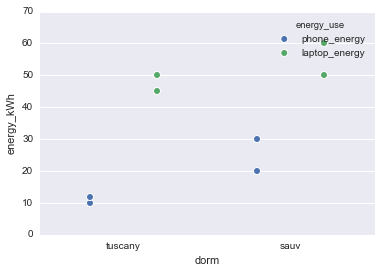

In [34]:
sns.stripplot(data=tidy_df, x='dorm', y='energy_kWh', hue='energy_use')